In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [85]:
train = pd.read_csv('Train.csv', parse_dates=['Date'])
test = pd.read_csv('Test.csv', parse_dates=['Date'])
submissions = pd.read_csv('SampleSubmission.csv')

In [86]:
print(train.shape)
print(test.shape)

(30557, 82)
(16136, 77)


In [87]:
traincols = list(train.columns)
testcols = list(test.columns)
#print(traincols)
#print(testcols)

In [56]:
#list(traincols)

In [9]:
#train = train.drop(['Place_ID X Date', 'Place_ID', 'Date'], axis=1)
test = test.drop(['Place_ID X Date', 'Place_ID', 'Date'], axis=1)

In [24]:
train = train.drop(['target_min', 'target_max', 'target_variance', 'target_count'], axis=1)

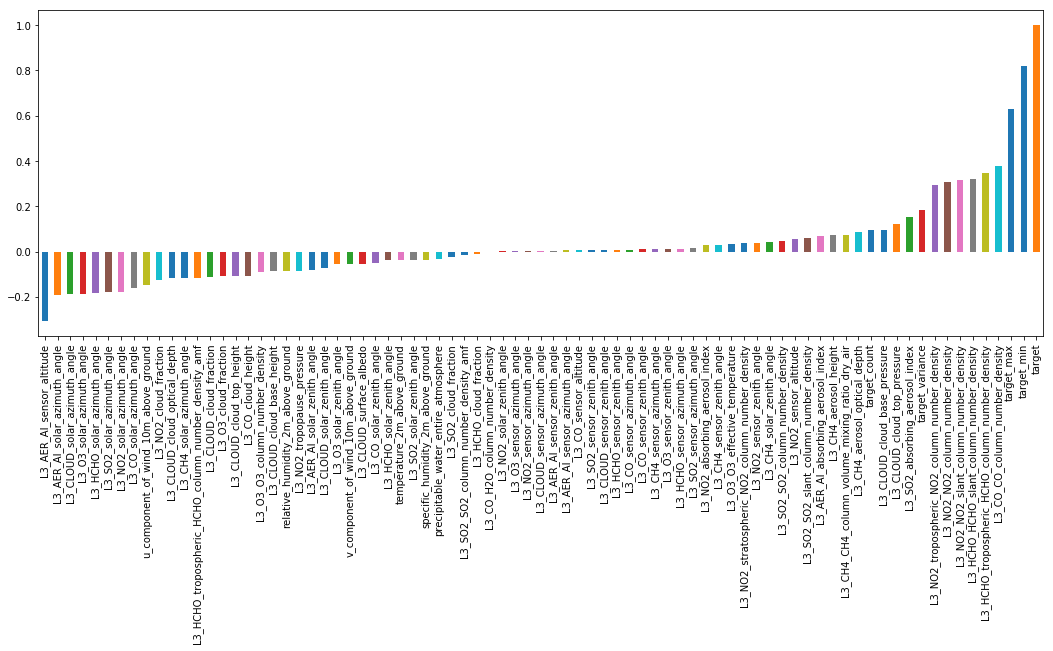

In [48]:
# Look at correlation with target
train.corr()['target'].sort_values().plot(kind='bar', figsize=(18, 6))

In [65]:
# Look at correlation with target
corr = dict(train.corr()['target'].sort_values())
#print(corr)

In [88]:
extracted_columns = ['relative_humidity_2m_above_ground', 'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
                     'u_component_of_wind_10m_above_ground', 'v_component_of_wind_10m_above_ground', 'L3_NO2_NO2_column_number_density',
                     'L3_NO2_NO2_slant_column_number_density', 'L3_NO2_sensor_altitude', 'L3_NO2_tropospheric_NO2_column_number_density',
                     'L3_O3_O3_column_number_density', 'L3_CO_CO_column_number_density', 'L3_CO_solar_zenith_angle', 
                    'L3_CLOUD_cloud_optical_depth', 'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index', 'L3_AER_AI_sensor_altitude',
                     'Place_ID X Date', 'Place_ID', 'Date']

In [90]:
for i in testcols:
    if i not in extracted_columns:
        test = test.drop(i, axis=1)
for j in traincols:
    if j not in extracted_columns:
        train = train.drop(j, axis=1)

In [89]:
Labels = np.array(train['target'])
print(Labels)
#train = train.drop(['target'], axis=1)

[ 38.  39.  24. ...  85. 103.  89.]


In [91]:
train.head()

,Place_ID X Date,Date,Place_ID,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_sensor_altitude,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_solar_zenith_angle,L3_CLOUD_cloud_optical_depth,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude
0,010Q650 X 2020-01-02,2020-01-02,010Q650,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,840209.874619,0.000017,0.119095,0.021080,22.379054,NaN,NaN,-1.231330,840209.874619
1,010Q650 X 2020-01-03,2020-01-03,010Q650,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,840772.941995,0.000021,0.115179,0.022017,33.089495,5.958538,0.315403,-1.082553,840772.941995
2,010Q650 X 2020-01-04,2020-01-04,010Q650,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,841410.713456,0.000007,0.115876,0.020677,34.308941,5.755760,0.307463,-1.001241,841410.713456
3,010Q650 X 2020-01-05,2020-01-05,010Q650,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,841103.242368,0.000023,0.141557,0.021207,30.544513,6.246885,0.279637,-0.777023,841103.242368
4,010Q650 X 2020-01-06,2020-01-06,010Q650,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,840763.055499,0.000009,0.126369,0.037766,26.906207,4.205691,0.238241,0.366324,840763.055499


In [78]:
pd.get_dummies(train, columns=['Place_ID'])

,Place_ID X Date,Date,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_sensor_altitude,...,Place_ID_YAQHNNY,Place_ID_YAXBMZ6,Place_ID_YCXA4V5,Place_ID_YDW4K0H,Place_ID_YJENTFL,Place_ID_YLLOKEY,Place_ID_YLZOBFW,Place_ID_YPXSK14,Place_ID_YSIXKFZ,Place_ID_YWSFY6Q
0,010Q650 X 2020-01-02,2020-01-02,60.200001,0.008040,18.516840,1.996377,-1.227395,0.000074,0.000156,840209.874619,...,0,0,0,0,0,0,0,0,0,0
1,010Q650 X 2020-01-03,2020-01-03,48.799999,0.008390,22.546533,3.330430,-1.188108,0.000076,0.000197,840772.941995,...,0,0,0,0,0,0,0,0,0,0
2,010Q650 X 2020-01-04,2020-01-04,33.400002,0.007500,27.031030,5.065727,3.500559,0.000067,0.000170,841410.713456,...,0,0,0,0,0,0,0,0,0,0
3,010Q650 X 2020-01-05,2020-01-05,21.300001,0.003910,23.971857,3.004001,1.099468,0.000083,0.000175,841103.242368,...,0,0,0,0,0,0,0,0,0,0
4,010Q650 X 2020-01-06,2020-01-06,44.700001,0.005350,16.816309,2.621787,2.670559,0.000070,0.000142,840763.055499,...,0,0,0,0,0,0,0,0,0,0
5,010Q650 X 2020-01-07,2020-01-07,42.200001,0.005862,19.174890,2.955603,0.969075,0.000069,0.000146,840356.873809,...,0,0,0,0,0,0,0,0,0,0
6,010Q650 X 2020-01-08,2020-01-08,47.100002,0.005723,17.018274,2.221650,-0.931121,0.000060,0.000179,840805.255366,...,0,0,0,0,0,0,0,0,0,0
7,010Q650 X 2020-01-09,2020-01-09,62.400002,0.007378,16.616602,3.287685,-0.880361,0.000068,0.000199,840508.551309,...,0,0,0,0,0,0,0,0,0,0
8,010Q650 X 2020-01-10,2020-01-10,39.000000,0.005450,19.222192,2.722092,4.183457,0.000071,0.000156,841197.077771,...,0,0,0,0,0,0,0,0,0,0
9,010Q650 X 2020-01-11,2020-01-11,33.100002,0.005503,22.009790,2.478940,3.750989,0.000072,0.000139,840873.873880,...,0,0,0,0,0,0,0,0,0,0


In [80]:
train1 = pd.get_dummies(train, columns=['Place_ID'])

In [103]:
train.shape

(30557, 20)

In [92]:
train['month'] = train.Date.dt.month
train['year'] = train.Date.dt.year

In [94]:
test['month'] = test.Date.dt.month
test['year'] = test.Date.dt.year

In [100]:
train['month'].value_counts()

3    10023
1     9717
2     9507
4     1310
Name: month, dtype: int64

In [118]:
train = train.drop(['Date'], axis=1)
test = test.drop(['Date'], axis=1)

In [105]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Place_ID'] = label_encoder.fit_transform(train['Place_ID'])
test['Place_ID'] = label_encoder.fit_transform(test['Place_ID'])

In [113]:
train.head()

,Date,Place_ID,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_sensor_altitude,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_solar_zenith_angle,L3_CLOUD_cloud_optical_depth,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,month
0,2020-01-02,0,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,840209.874619,0.000017,0.119095,0.021080,22.379054,NaN,NaN,-1.231330,840209.874619,1
1,2020-01-03,0,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,840772.941995,0.000021,0.115179,0.022017,33.089495,5.958538,0.315403,-1.082553,840772.941995,1
2,2020-01-04,0,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,841410.713456,0.000007,0.115876,0.020677,34.308941,5.755760,0.307463,-1.001241,841410.713456,1
3,2020-01-05,0,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,841103.242368,0.000023,0.141557,0.021207,30.544513,6.246885,0.279637,-0.777023,841103.242368,1
4,2020-01-06,0,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,840763.055499,0.000009,0.126369,0.037766,26.906207,4.205691,0.238241,0.366324,840763.055499,1


In [119]:
from sklearn.preprocessing import Imputer

imp_mean = Imputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

imp_mean = Imputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(test)
imputed_test_df = imp_mean.transform(test)

Features = np.array(imputed_train_df)
test_enc = np.array(imputed_test_df)

In [120]:
train.head()

,Place_ID,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_sensor_altitude,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_solar_zenith_angle,L3_CLOUD_cloud_optical_depth,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,month
0,0,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,840209.874619,0.000017,0.119095,0.021080,22.379054,NaN,NaN,-1.231330,840209.874619,1
1,0,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,840772.941995,0.000021,0.115179,0.022017,33.089495,5.958538,0.315403,-1.082553,840772.941995,1
2,0,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,841410.713456,0.000007,0.115876,0.020677,34.308941,5.755760,0.307463,-1.001241,841410.713456,1
3,0,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,841103.242368,0.000023,0.141557,0.021207,30.544513,6.246885,0.279637,-0.777023,841103.242368,1
4,0,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,840763.055499,0.000009,0.126369,0.037766,26.906207,4.205691,0.238241,0.366324,840763.055499,1


In [121]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=600, max_depth=16, max_features='auto',
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
model = rf.fit(x_train, y_train)

In [124]:
predictions = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions) ** 0.5

30.014267360673006

In [125]:
preds = rf.predict(test_enc)
submissions.target = preds
submissions.to_csv('rf_new.csv', index=False)

In [ ]:
from sklearn.model_selection import cross_val_score

def crossValScore(self, x_train, y_train, x_test, y_test):
        ## Getting num of features for cross-validation
        x_test = self.__vectorizers.transform(x_test)
        print("num of test_samples: %d, num of test_features: %d \n" % x_test.shape)

        kfold = KFold(n=x_test.shape[1], n_folds=4, shuffle=True, random_state=337)
            
        x_shuf, y_shuf = shuffle(x_test, y_test)
        cross_val_score = cross_validation.cross_val_score(self.models_, x_shuf, \
                                                            x_shuf, cv=kfold, \
                                                            scoring='accuracy', n_jobs=-1  # -1 = use all cores = faster
                                                            )
        print("\ncross_validation:\n",cross_val_score , "\n")
        print("Baseline: %.2f%% (%.2f%%)" % (cross_val_score.mean()*100, cross_val_score.std()*100)) 
